In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# Diametro (cm)
d = [[7],[10],[15],[30],[45]]

#Preços (R$)
p = [[8],[11],[16],[38.5],[52]]

In [ ]:
plt.figure()
plt.xlabel('Diâmetro (cm)')
plt.ylabel('Preço (R$)')
plt.title('Diâmetro x Preço')
plt.plot(d, p, 'k.')
plt.axis([0, 60, 0, 60])
plt.grid(True)
plt.show()

In [ ]:
#Importando o módulo de Regressão Linear 
from sklearn.linear_model import LinearRegression

In [ ]:
X = [[7],[10],[15],[30],[45]]
Y = [[8],[11],[16],[38.5],[52]]

In [ ]:
#Criando o modelo
modelo = LinearRegression()

In [ ]:
type(modelo)

In [ ]:
#Treinando o modelo
modelo.fit(X,Y) 

In [ ]:
#modelo.predict([[24],[0]])

In [ ]:
## Prevendo o preço de uma pizza de 20cm de diâmetro
print('Uma pizza de 20 cm de diâmetro deve custar: R$%.2f' % modelo.predict([[20]]))

##### O método fit() do modelo LinearRegression aprende os parâmetros do seguinte modelo de regressão linear simples

In [ ]:
!pip install Ipython


#### Construindo um Scatter Plot

In [ ]:
print('Coeficiente: \n', modelo.coef_)

In [ ]:
# Erro quadratico (MSE)
print('EQ: %.2f' %np.mean((modelo.predict(X)-Y)**2))

In [ ]:
#Score de variação: 1 representa predição perfeita
print('EQ: %.2f' %modelo.score(X,Y))

In [ ]:
# Scatter plot representando a regressão linear
plt.scatter(X, Y, color = 'black')
plt.plot(X, modelo.predict(X), color = 'blue', linewidth = 3)
plt.xlabel('Diâmetro (cm)')
plt.ylabel('Preçco (R$)')
plt.xticks(())
plt.yticks(())
plt.show()

2. ### Explorando o Dataset Boston Housing

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
type(boston)

In [ ]:
boston.data.shape

In [ ]:
# descrição do dataset
print(boston.DESCR)

In [ ]:
print(boston.feature_names)

In [ ]:
df = pd.DataFrame(boston.data)
df.head()

In [ ]:
df.columns = boston.feature_names
df.head()

In [ ]:
boston.target

In [ ]:
#Adicionando o preço de cada casa ao DataFrame
df['PRICE'] = boston.target
df.head()

In [ ]:
df.drop('PREÇO',1)

In [ ]:
#df.head()

## Prevendo o preço das casas em Boston

#### Y -  variável dependente (preço das casas)
#### X - variaveis independentes ou explanatórias (todas as outras caracteristicas da casa)

In [ ]:
#Definindo Y
Y = df.PRICE

In [ ]:
# Não queremos o preço da casa como var. dependente
X = df.drop(['PRICE','PREÇO'], 1)

In [ ]:
X.head()

In [ ]:
plt.scatter(df.RM, Y)
plt.xlabel('Média de Nº de Quartos por Casa')
plt.ylabel('Preço da Casa')
plt.title('Relação entre Nº de Quartos e Preço')
plt.show()

In [ ]:
#Criando objeto de regressão linear
reg= LinearRegression()

In [ ]:
type(reg)

In [ ]:
reg.fit(X,Y)

In [ ]:
print('Coeficiente: ',reg.intercept_)
print('Número de Coeficientes: ',len(reg.coef_))

In [ ]:
# isso nao é iedal (envolve overfit), mas só um exemplo para ilustrar
reg.predict(X)

In [ ]:
#Comparando preços originais x preços previstos
plt.scatter(df.PRICE, reg.predict(X))
plt.xlabel('Preço Original')
plt.ylabel('Preço Previsto')
plt.title('Preço Original X Preço Previsto')
plt.show()

### Ver os erros cometidos na prediação do preço das casas

In [ ]:
mse1 = np.mean((df.PRICE -reg.predict(X))**2)
mse1

In [ ]:
#Aplicando regressão linear para apenas uma variavel e calculando o MSE
reg = LinearRegression()
reg.fit(X[['PTRATIO']], df.PRICE)
mse2 = np.mean((df.PRICE - reg.predict(X[['PTRATIO']]))**2)
mse2

### Note que o Erro Quadratico aumentou. Isso indica que uma caracteristica( variavel) não é um bo predictor para o preço das casas

##### Na pratica vc nao vai implementar regressão linear em toso o dataset. Vc vai dividir o dataset em dataset de treino e de teste. Assim, vc treina seu modelo nos dados e depois verifica como o modelo se comprta nos seus dados de tste

#### Essa nao é a forma correta de dividir o dataset

In [ ]:
# Dividindo X em dataset de treino e de teste
x_treino = X[:-50]
x_teste = X[:-50]

# Dividindo Y em dataset de treino e de teste
y_treino = df.PRICE[:-50]
y_teste = df.PRICE[:-50]

#Imprimindo o shape dos datasets
print(x_treino.shape, x_teste.shape,y_treino.shape, y_teste.shape)

#### Podemos criar nossos datasets de treino de forma manual, mas claro, este não é o método correto. Dividimos os datasets randomicamente. O Scikit-Learn provê uma função randomica chamada train_test_split() para isso

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Dividir X e Y em dataset de treino e de teste
x_treino, x_teste,y_treino, y_teste = train_test_split(X, df.PRICE, test_size=0.30, random_state=5)

In [ ]:
print(x_treino.shape, x_teste.shape,y_treino.shape, y_teste.shape)

In [ ]:
# Construindo novo modelo de regressão
reg = LinearRegression()

In [ ]:
#Treinando o modelo
reg.fit(x_treino, y_treino)

In [ ]:
#Definindo dados de treino e de teste
pred_trino = reg.predict(x_treino)
pred_teste = reg.predict(x_teste)

In [ ]:
#Comparando preços originais X preços previstos
plt.scatter(reg.predict(x_treino), reg.predict(x_treino)- y_treino, c= 'b', s=40, alpha=0.5)
plt.scatter(reg.predict(x_teste), reg.predict(x_teste)- y_teste, c= 'g', s=40, alpha=0.5)
plt.hlines(y=0 , xmin= 0, xmax= 50)
#plt.xlabel('')
plt.ylabel('Resíduo')
plt.title('Residual Plot - Treino(Azul), Teste(verde)')
plt.show()

## BOKEH
##### permite a construção de gráficos com intertividade de alto desempenho em conjuntos de dados muito grandes (Big Data) ou de streaming (Real-Time Data) de uma maneira rápida e fácil
* permite contruir grafos estatísticos complexos de forma rápida
* https://docs.bokeh.org/en/latest/

In [ ]:
!pip install bokeh

In [ ]:
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, output_file
from bokeh.models import ColumnDataSource
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6


In [ ]:
#Carregando Bokeh
output_notebook()

In [ ]:
#Arquivo gerado pela visualização
output_file('Bokeh-Grafico-Interativo.html')

In [ ]:
p = figure()

In [ ]:
type(p)

In [ ]:
p.line([1,2,3,4,5],[6,7,2,4,5], line_width= 2)

In [ ]:
show(p)

In [ ]:
#Criando um novo gráfico
output_file = ('Bokeh-Grafico-Barras.html')

frutas = ['Maçãs','pera','Tangerinas', 'Uvas', 'Melancias','Morangos' ]
counts = [5,3,4,2,4,6]
source = ColumnDataSource(data=dict(fruits=frutas, counts=counts))

p = figure(x_range=frutas, plot_height=350, toolbar_location=None, title= 'Contagem de Frutas')
p.vbar(x='frutas',
      top='counts',
      width=0.9,
      source=source,
      legend='frutas',
      line_color= 'white',
      fill_color = factor_cmap('frutas', palette=Spectral6, factors=frutas)
      )

p.xgrid.grid_line_color = None
p.y_range.start= 0
p.y_range.end = 9
p.legend.orientation = 'horizontal'
p.legend.location = 'top_center'

show(p)

In [ ]:
#Outro exemplo


## <center>ScatterPlot</center>

In [ ]:
#contruindo um scatterPlot
from bokeh.sampledata.iris import flowers

#Codigo abaixo exibindo erros (repita cap08-06)

In [ ]:
colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]
#print(colors)

p= figure(title= 'Iris Morfology')
p.xaxis.axis_label = ' Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers['Petal Length'], flowers['Petal Width'], color=colors, fill_alpha= 0.2, sixe= 10)
output_file('Bokeh_Grafico_Iris.html', title= 'iris.py exmaple')

show(p)

## <center> SatsModels</center>

In [4]:
!pip install pylab

In [ ]:
# Assistir Introdução à Ciencia de Dados 2.0 para melhor entender o capítulo

In [6]:
# Para visualização de grafos
from pylab import *

## <center> ---------------------------------------------------------------- </center>

## <center>Seaborn</center>

In [7]:
# seaborn roda sobre matplotlib
!pip install seaborn

In [8]:
import seaborn as sea

In [9]:
#Carregando um dos datasets que vem com o Seaborn
dados = sea.load_dataset('tips') 
# tip = gorjeta

In [11]:
dados.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Regressão Linear é uma equação para se estimar a condicionar (vlaor esperado) de uma variável Y, dados os valores de algumas outras variáveis X

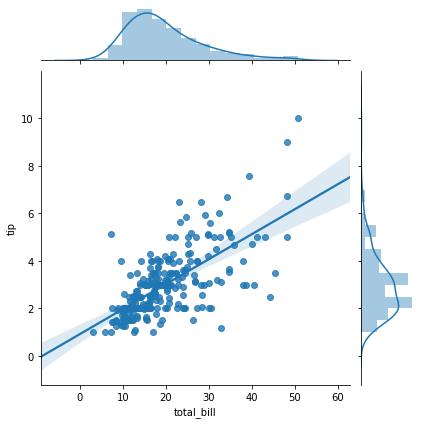

In [14]:
# o método jointplot cria plot de 2 variáveis com gráficos bivariados e univariados
sea.jointplot('total_bill', 'tip', dados, kind = 'reg')

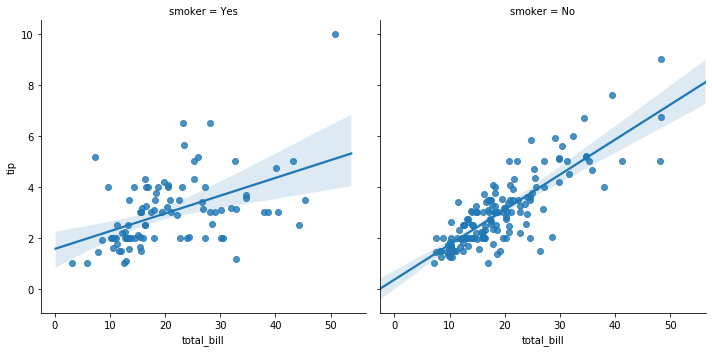

In [18]:
# O métodod lmplot() cria plot com dados e modelos de regressão
sea.lmplot('total_bill', 'tip', dados, col = 'smoker')

In [21]:
# contruindo uma daframe com pandas
df = pd.DataFrame()

In [23]:
# Alimentando o dataframe com valores aleatorios
import random
df['a'] = random.sample(range(1,100),25)
df['b'] = random.sample(range(1,100),25)

In [24]:
df.head()

,a,b
0,53,2
1,94,6
2,21,71
3,44,60
4,31,93


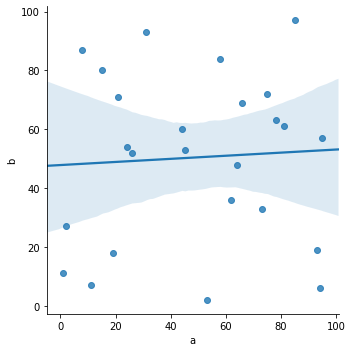

In [25]:
sea.lmplot('a', 'b', data= df, fit_reg= True)

In [26]:
# Density Plot

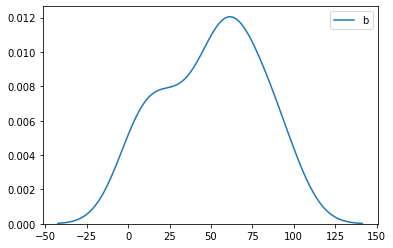

In [27]:
sea.kdeplot(df.b)

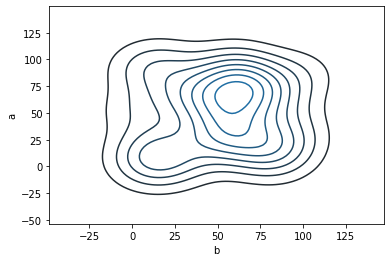

In [28]:
sea.kdeplot(df.b, df.a)

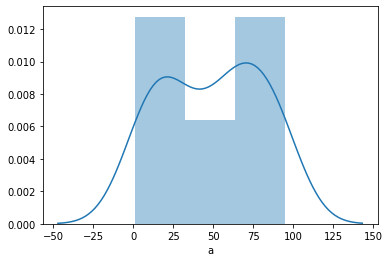

In [29]:
sea.distplot(df.a)

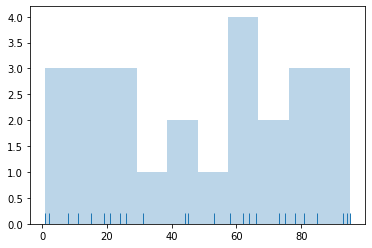

In [32]:
# Histograma
plt.hist(df.a, alpha = .3)
sea.rugplot(df.a)

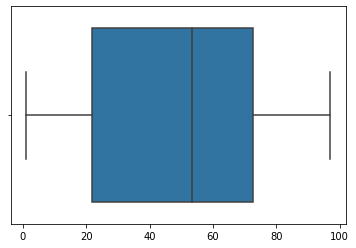

In [33]:
# Box Plot
sea.boxplot([df.b, df.a])

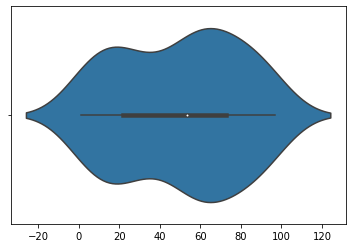

In [34]:
# Violin Plot
sea.violinplot([df.a, df.b])

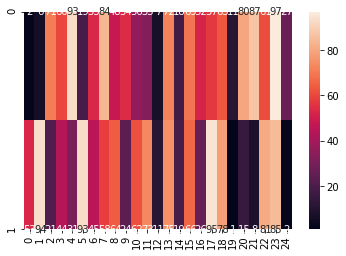

In [35]:
# HeatMap
sea.heatmap([df.b, df.a], annot= True, fmt = 'd')

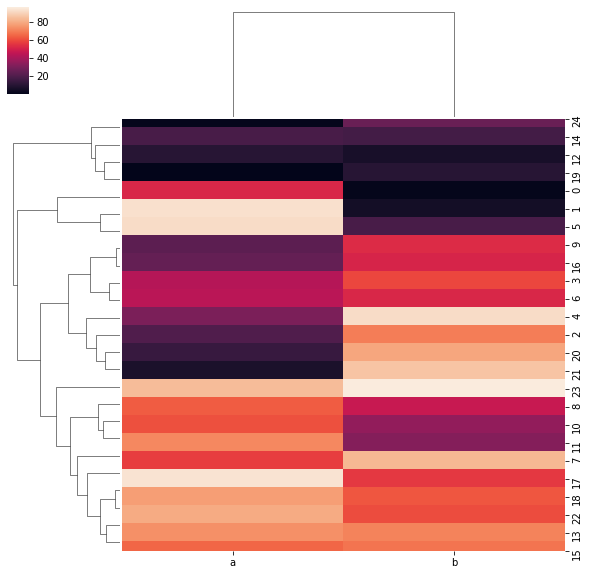

In [36]:
# Clustermap
sea.clustermap(df)

### Temas

In [37]:
# Configurações globais para controlar estilos, tamanho de fonte, cores, etc.
sea.set(context='notebook', style='darkgrid', palette='dark')

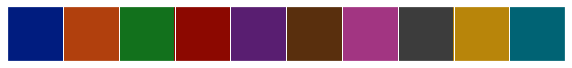

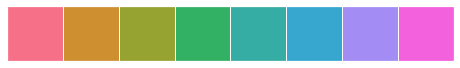

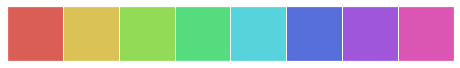

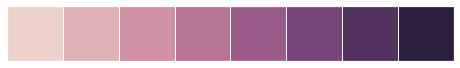

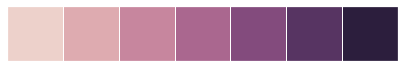

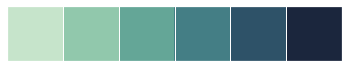

In [47]:
# Seaborn possui opções de cores variadas
sea.palplot(sea.color_palette())
sea.palplot(sea.color_palette('husl', 8))
sea.palplot(sea.color_palette('hls', 8))
sea.palplot(sea.cubehelix_palette(8))
sea.palplot(sea.cubehelix_palette(7))
sea.palplot(sea.cubehelix_palette(rot=-.4))
#sea.palplot(sea.cubehelix_palette(reverse=True))


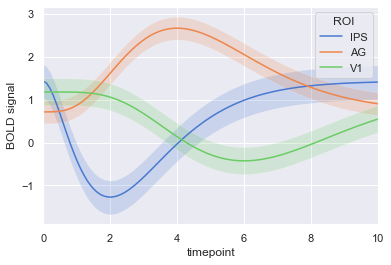

In [42]:
# O método tsplot cria plots a partir de séries temporais
gammas = sea.load_dataset('gammas')
sea.tsplot(gammas, 'timepoint', 'subject', 'ROI', 'BOLD signal', color= 'muted')

### Outros Plots

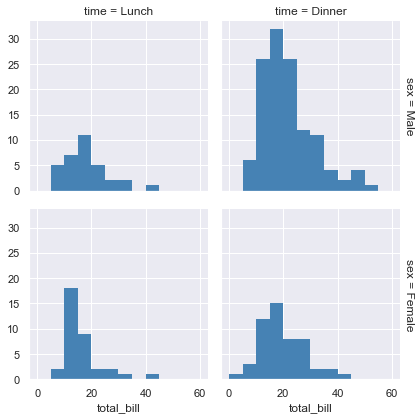

In [50]:
# Histograma com subsets dos dados
sea.set(style = 'darkgrid')

dados = sea.load_dataset('tips')
g = sea.FacetGrid(dados, row= 'sex', col = 'time', margin_titles= True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, 'total_bill', color= 'steelblue', bins= bins, lw= 0)

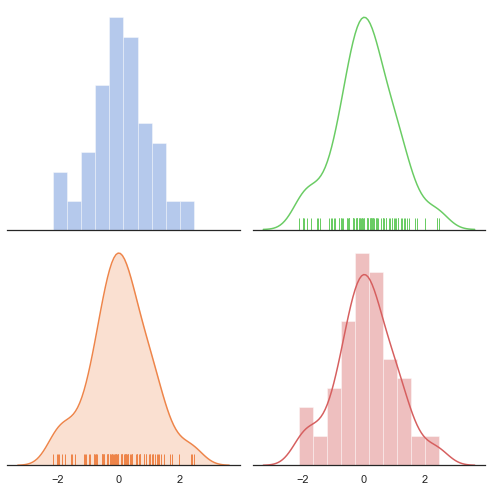

In [53]:
# Diversos plots simultâneos
sea.set(style= 'white', palette= 'muted')
f, axes = plt.subplots(2,2,figsize=(7,7), sharex= True)
sea.despine(left=True)
rs = np.random.RandomState(10)
b, g, r, p = sea.color_palette('muted', 4)
d = rs.normal(size= 100)

sea.distplot(d, kde= False, color= b, ax = axes[0,0])
sea.distplot(d, hist=False, rug=True, color= r, ax= axes[0,1])
sea.distplot(d, hist=False, rug=True, color= g, kde_kws = {'shade': True}, ax= axes[1,0])
sea.distplot(d, color= p, ax= axes[1,1])

plt.setp(axes, yticks = [])
plt.tight_layout()

c:\users\102869\python3.7-64\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


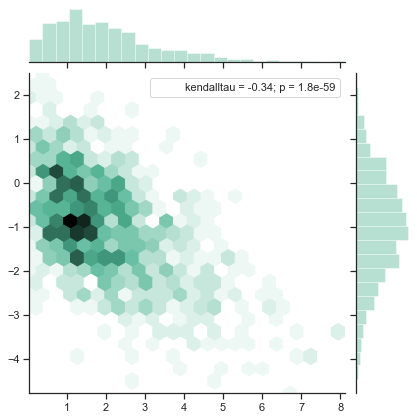

In [54]:
# Plot com distribuyições marginais
from scipy.stats import kendalltau

sea.set(style= 'ticks')
rs = np.random.RandomState(11)
x = rs.gamma(2, size= 1000)
y = -.5*x + rs.normal(size= 1000)
sea.jointplot(x, y, kind= 'hex', stat_func= kendalltau, color= '#4cb391')

In [58]:
!pip install statsmodels

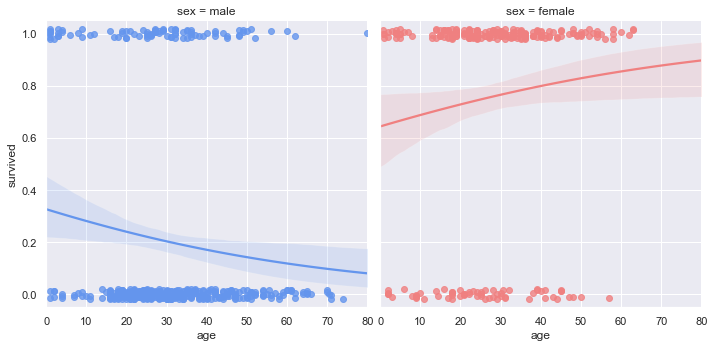

In [59]:
# Regressão Logística

sea.set(style= 'darkgrid')
df = sea.load_dataset('titanic')

pal = dict(male= '#6495ed', female= '#f08080')
g = sea.lmplot('age', 'survived', col= 'sex', hue = 'sex', data = df, palette =pal, y_jitter = .02, logistic= True)
g.set(xlim=(0,80), ylim=(-.05, 1.05))

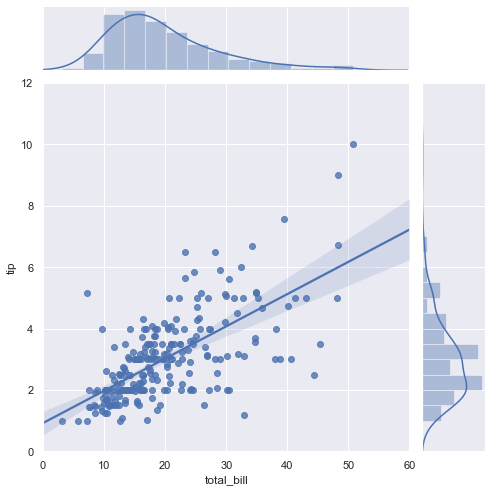

In [65]:
sea.set(style= 'darkgrid')
tips = sea.load_dataset('tips')
color = sea.color_palette()[0]
g = sea.jointplot('total_bill', 'tip', data= tips, kind='reg', xlim=(0, 60), 
                  ylim=(0, 12), color=color, size= 7)

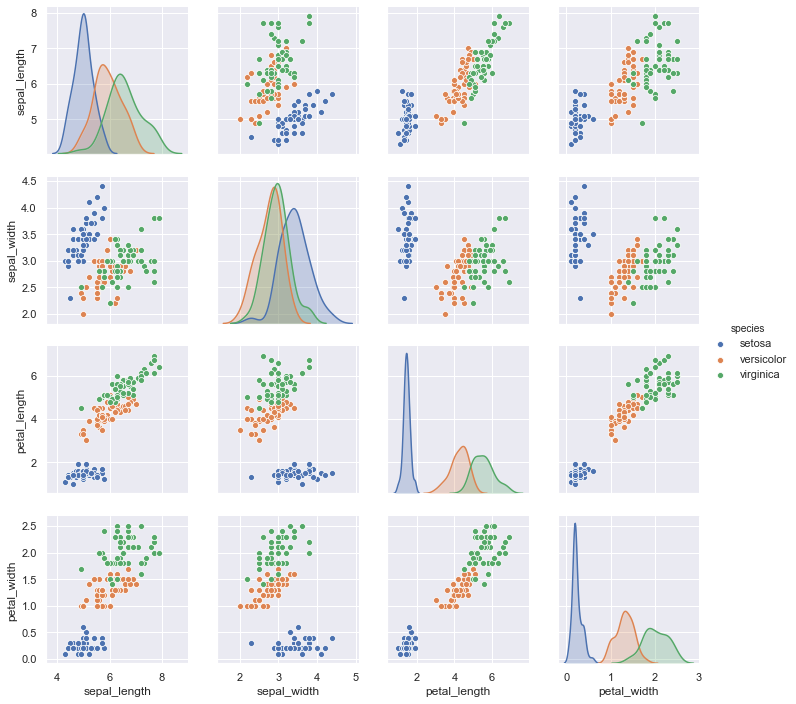

In [73]:
# Pair Plots
sea.set(style= 'darkgrid')
tips = sea.load_dataset('iris')
sea.pairplot(tips, hue='species', size= 2.5) # df nao funcionou (acabei usando iris)